In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('final.csv')

In [3]:
#todo check correlation after dtype categorical data. do the step by step.

## reorganize the columns and keep the useful ones

In [4]:
cols = list(df.columns.values)
cols

['Barragem_Nome',
 'Barragem_Altura_AcimaNivelTerreno',
 'Barragem_Capacidade',
 'Barragem_Principal_Tipo_material',
 'Barragem_Principal_comprimento',
 'Uso_principal',
 'Barragem_Categoria_Risco',
 'Barragem_Dano_Potencial_Associado',
 'TemPAE',
 'TemPlanoSeguranca',
 'TemRevisaoPeriodica',
 'CriterioVazaoProjeto_OrgaoExtravasor',
 'TemProjetoExecutivo',
 'TemProjetoComo construido',
 'TemProjetoBasico',
 'TemProjetoConceitual',
 'TemEclusa',
 'Barragem_FasedeVida',
 'ReguladaPNSB',
 'Barragem Pública ou particular',
 'Submetida à algum regulamento?',
 'material_score',
 'risco_score',
 'DPA_score',
 'temPAE_score',
 'temPS_score',
 'maintenance_score',
 'vazao_score',
 'doc_score',
 'Eclusa_score']

In [5]:
df.drop(columns=['Barragem_Nome','Barragem_Principal_Tipo_material','Uso_principal',
 'Barragem_Categoria_Risco',
 'Barragem_Dano_Potencial_Associado',
 'TemPAE',
 'TemPlanoSeguranca',
 'TemRevisaoPeriodica',
 'CriterioVazaoProjeto_OrgaoExtravasor',
 'TemProjetoExecutivo',
 'TemProjetoComo construido',
 'TemProjetoBasico',
 'TemProjetoConceitual',
 'TemEclusa'], inplace=True)

In [6]:
df.drop(columns=['ReguladaPNSB',
 'Barragem Pública ou particular',
 'Submetida à algum regulamento?'], inplace = True)

In [7]:
df.drop(columns=['Barragem_FasedeVida'], inplace = True)

## one-hot enconding 

In [8]:
from sklearn.preprocessing import LabelBinarizer

In [9]:
'''lb = LabelBinarizer()

fit = lb.fit_transform(df['Barragem_FasedeVida'].values)
dfOneHot = pd.DataFrame(fit, columns = ['vida_'+str(int(i)) for i in range(fit.shape[1])])
final = pd.concat([df, dfOneHot], axis=1)'''

"lb = LabelBinarizer()\n\nfit = lb.fit_transform(df['Barragem_FasedeVida'].values)\ndfOneHot = pd.DataFrame(fit, columns = ['vida_'+str(int(i)) for i in range(fit.shape[1])])\nfinal = pd.concat([df, dfOneHot], axis=1)"

In [10]:
'''#drop one-hot-econding features
final.drop(columns=['Barragem_FasedeVida'], inplace=True)'''

"#drop one-hot-econding features\nfinal.drop(columns=['Barragem_FasedeVida'], inplace=True)"

In [11]:
df.columns

Index(['Barragem_Altura_AcimaNivelTerreno', 'Barragem_Capacidade',
       'Barragem_Principal_comprimento', 'material_score', 'risco_score',
       'DPA_score', 'temPAE_score', 'temPS_score', 'maintenance_score',
       'vazao_score', 'doc_score', 'Eclusa_score'],
      dtype='object')

In [12]:
df.isnull().sum()

Barragem_Altura_AcimaNivelTerreno    4482
Barragem_Capacidade                  2449
Barragem_Principal_comprimento       4550
material_score                       2953
risco_score                          4751
DPA_score                            3260
temPAE_score                         3411
temPS_score                          3352
maintenance_score                    4095
vazao_score                             0
doc_score                            5047
Eclusa_score                          564
dtype: int64

In [13]:
ds = df.dropna()

In [14]:
ds

,Barragem_Altura_AcimaNivelTerreno,Barragem_Capacidade,Barragem_Principal_comprimento,material_score,risco_score,DPA_score,temPAE_score,temPS_score,maintenance_score,vazao_score,doc_score,Eclusa_score
239,29.00,18.790,296.84,3.0,50.0,21.0,5.0,5.0,5.0,10,4.0,0.0
240,33.50,245.376,1320.00,3.0,70.0,21.0,5.0,5.0,5.0,10,2.0,0.0
241,33.00,170.000,1760.00,3.0,50.0,21.0,5.0,5.0,5.0,3,2.0,0.0
242,41.00,339.390,520.00,3.0,0.0,21.0,5.0,5.0,5.0,3,8.0,0.0
243,23.33,48.608,1074.34,1.0,50.0,21.0,1.0,5.0,5.0,5,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9811,27.00,3800.000,1030.00,3.0,30.0,21.0,1.0,1.0,5.0,3,2.0,0.0
9812,18.00,14.380,591.50,3.0,30.0,21.0,1.0,1.0,5.0,3,2.0,0.0
9813,14.00,14.380,531.50,3.0,30.0,14.0,1.0,1.0,5.0,3,2.0,0.0
9814,12.00,14.380,183.50,3.0,30.0,14.0,1.0,1.0,5.0,3,2.0,0.0


## first test with decision tree, target = risk. 

In [15]:
# !!!!!!! scale numerical properly (other features). copy for loop from MVP. 

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [17]:
var1 = ['DPA_score'] #'risco_score' keep as classification

scaler = MinMaxScaler(feature_range=(-2,2))

for name in var1:
    ds[name] = scaler.fit_transform(ds[name].values.reshape(-1, 1))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
var2 = ['Barragem_Altura_AcimaNivelTerreno', 'Barragem_Capacidade',
       'Barragem_Principal_comprimento']

scaler = MinMaxScaler(feature_range=(-2,2))

for name in var2:
    ds[name] = scaler.fit_transform(ds[name].values.reshape(-1, 1))
    
#dfOneHot = pd.DataFrame(fit, columns = [name+str(int(i)) for i in range(fit.shape[1])])
#mvp = pd.concat([mvp, dfOneHot], axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [19]:
ds

,Barragem_Altura_AcimaNivelTerreno,Barragem_Capacidade,Barragem_Principal_comprimento,material_score,risco_score,DPA_score,temPAE_score,temPS_score,maintenance_score,vazao_score,doc_score,Eclusa_score
239,-1.874081,-1.998680,-1.994220,3.0,50.0,2.0,5.0,5.0,5.0,10,4.0,0.0
240,-1.854338,-1.982766,-1.974228,3.0,70.0,2.0,5.0,5.0,5.0,10,2.0,0.0
241,-1.856532,-1.988060,-1.965631,3.0,50.0,2.0,5.0,5.0,5.0,3,2.0,0.0
242,-1.821432,-1.976162,-1.989859,3.0,0.0,2.0,5.0,5.0,5.0,3,8.0,0.0
243,-1.898958,-1.996586,-1.979028,1.0,50.0,2.0,1.0,5.0,5.0,5,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9811,-1.882856,-1.733099,-1.979894,3.0,30.0,2.0,1.0,1.0,5.0,3,2.0,0.0
9812,-1.922343,-1.998990,-1.988462,3.0,30.0,2.0,1.0,1.0,5.0,3,2.0,0.0
9813,-1.939893,-1.998990,-1.989635,3.0,30.0,0.0,1.0,1.0,5.0,3,2.0,0.0
9814,-1.948667,-1.998990,-1.996434,3.0,30.0,0.0,1.0,1.0,5.0,3,2.0,0.0


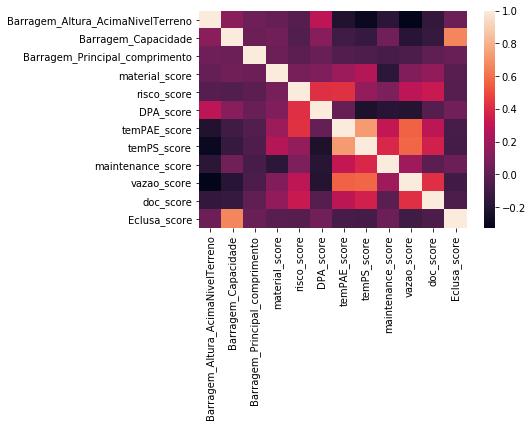

In [20]:
sns.heatmap(ds.corr())

In [21]:
y = ds['risco_score']
X = ds.drop(['risco_score'], axis = 1)

In [22]:
# divide train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [23]:
#NaN issue here
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train) #sample is random, but is not that. It starts for a different order everytime for decision tree.
y_pred = dtc.predict(X_test) #this is to see the item or the dataset and predict. For example, check behaviour for outliers. 
acc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy for risk {round(acc, 2)}%")

Decision Tree Test Accuracy for risk 70.94%


In [24]:
#redo everything following these steps:
#https://towardsdatascience.com/machine-learning-on-categorical-variables-3b76ffe4a7cb
#obs: how to fill nans:
#test['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)